# Data Mining and Machine Learning - Team Tissot

***Detecting the difficulty level of French texts***


import func:

In [ ]:
!pip install requests
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/danieldovale/DMML2022_Tissot/main/code/function.py'
r = requests.get(url)

# make sure your filename is the same as how you want to import 
with open('function.py', 'w') as f:
    f.write(r.text)

# now we can import
import function as f

To get started, let's import the required packages

In [ ]:
# Import required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")

# import some additional packages
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from google.colab import files

In [ ]:
from tqdm import tqdm

In [ ]:
# Install and update spaCy
!pip install -U spacy

# Download the french language model
!python -m spacy download fr

In [ ]:
# Import required packages
import spacy
from spacy import displacy

#Load French language model
sp = spacy.load("fr_core_news_sm")

Then, let's load the data and set "id" as the index column

In [ ]:
# training data:
dfTrain = pd.read_csv("https://raw.githubusercontent.com/danieldovale/DMML2022_Tissot/main/data/training_data.csv", index_col='id')

# unlabeled test data:
dfTest = pd.read_csv("https://raw.githubusercontent.com/danieldovale/DMML2022_Tissot/main/data/unlabelled_test_data.csv", index_col='id')

Let's have a look on what it looks like:

In [ ]:
dfTrain

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1
...,...,...
4795,"C'est pourquoi, il décida de remplacer les hab...",B2
4796,Il avait une de ces pâleurs splendides qui don...,C1
4797,"Et le premier samedi de chaque mois, venez ren...",A2


In [ ]:
dfTest

,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."
...,...
1195,C'est un phénomène qui trouve une accélération...
1196,Je vais parler au serveur et voir si on peut d...
1197,Il n'était pas comme tant de gens qui par pare...


In [ ]:
X = dfTrain["sentence"]
y = dfTrain["difficulty"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# The first part of the project

Here we train our models with the techniques seen in class (Logistic regression, KNN, Decision Tree, Random Forests)

## 1. Logistic Regression (without data cleaning)

A simple logistic regression model using a Tfidf vectoriser. 


In [ ]:
tfidf_vector = TfidfVectorizer() 

> Logistic Regression



In [ ]:
# Define classifier
classifier = LogisticRegression(max_iter=500, random_state = 0)

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 LogisticRegression(max_iter=500, random_state=0))])

> The accuracy, precision recall and F1 score of the test set.

In [ ]:
# Evaluate the model (had to add average param)
def evaluate(true, pred):
    precision = precision_score(true, pred, average = 'weighted')
    recall = recall_score(true, pred, average = 'weighted')
    f1 = f1_score(true, pred, average = 'weighted')
    print(f"Accuracy score: {accuracy_score(true, pred):.4f} \nPrecision: {precision:.4f} \nRecall: {recall:.4f} \nF1_Score: {f1:.4f}")

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
f1_score(y_test, y_pred, average = None)

array([0.61356932, 0.4290429 , 0.36486486, 0.43708609, 0.39464883,
       0.49343832])

In [ ]:
# Evaluation - test set of dfTrain
evaluate(y_test, y_pred)

Accuracy score: 0.4604 
Precision: 0.4582 
Recall: 0.4604 
F1_Score: 0.4561


> The confusion matrix

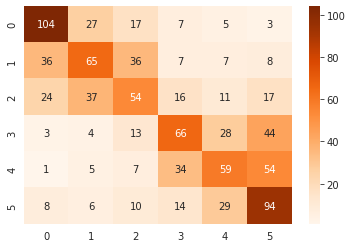

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');

In [ ]:
y_pred

> A few examples of sentences that are not well classified

In [ ]:
X_test[(y_test != y_pred)].iloc[0:5]

id
2003    Il est également connu pour ses publicités tél...
2585    Edgar, étincelant de furie, dominait tous les ...
2302                                    Ils sont heureux.
2958    Les canons renversèrent d'abord à peu près six...
3862    Parce que la philosophie se trouve de plus en ...
Name: sentence, dtype: object

In [ ]:
print(X_test[(y_test != y_pred)].iloc[0])
print("The level of difficulty :", y_test[2003])
print("The predicted level of difficulty :", y_pred[0])

Il est également connu pour ses publicités télévisées à faible budget et ses affiches imprimées à Albuquerque, dans lesquels il s'annonce principalement sous le slogan : "Appelez donc Saul !"
The level of difficulty : C1
The predicted level of difficulty : C2


In [ ]:
print(X_test[(y_test != y_pred)].iloc[3])
print("The level of difficulty :", y_test[2958])
print("The predicted level of difficulty :", y_pred[3])

Les canons renversèrent d'abord à peu près six mille hommes de chaque côté ; ensuite la mousqueterie ôta du meilleur des mondes environ neuf à dix mille coquins qui en infectaient la surface.
The level of difficulty : C1
The predicted level of difficulty : A1



###**Logistic Regression Parameters Tuning**

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# Create list of configs
def configs():

    models = list()
    
    # Define config lists
    C = [0.001, 0.01, 0.1, 1.0, 10, 100]
    solver = ['lbfgs', 'liblinear']
    iter = [100,300,500]
    # Create config instances
    for n in C:
      for i in solver:
        for j in iter:
          cfg = [n, i, j]
          models.append(cfg)
    return models

configs = configs()
configs

In [ ]:
# Define list for result
result = []

for config in tqdm(configs):


    # Define classifier
    classifier = LogisticRegression(C = config[0], solver = config[1], random_state = 0, max_iter = config[2])

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

 67%|██████▋   | 24/36 [00:16<00:08,  1.38it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 83%|████████▎ | 30/36 [00:30<00:07,  1.31s/it]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

In [ ]:
result.sort(key=lambda x: x[1], reverse=True)
LRTuningDF = (pd.DataFrame(result)).rename(columns = {0:'config', 1: 'accuracy'})

In [ ]:
LRTuningDF.head()

,config,accuracy
0,"[10, lbfgs, 100]",0.468750
1,"[10, liblinear, 100]",0.467708
2,"[10, liblinear, 300]",0.467708
3,"[10, liblinear, 500]",0.467708
4,"[10, lbfgs, 300]",0.465625


Now let's fit our model once again using the best parameters found

In [ ]:
# Define classifier
classifier = LogisticRegression(C = 10, solver = 'lbfgs', random_state = 0, max_iter = 100)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
              ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(C=10, random_state=0))])

In [ ]:
y_pred = pipe.predict(X_test)

Accuracy score: 0.4688 
Precision: 0.4665 
Recall: 0.4688 
F1_Score: 0.4653


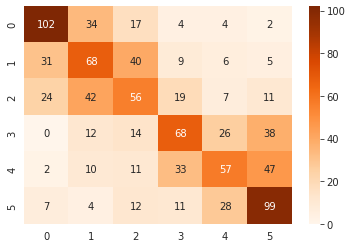

In [ ]:
evaluate(y_test, y_pred)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');

,accuracy,precision,recall,f1 score
results,0.4688,0.4665,0.4688,0.4653


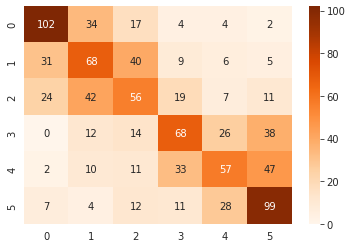

In [ ]:
def evaluate2(true, pred):
    precision = precision_score(true, pred, average = 'weighted')
    recall = recall_score(true, pred, average = 'weighted')
    f1 = f1_score(true, pred, average = 'weighted')
    acc = accuracy_score(true, pred)
    index = 'result'
    d = {'accuracy': round(acc,4), 'precision': round(precision,4), 'recall': round(recall,4), 'f1 score': round(f1,4) }
    df = pd.DataFrame(d,index=["results"])
    sns.heatmap(pd.DataFrame(confusion_matrix(true, pred)), annot=True, cmap='Oranges', fmt='.7g');
    return df
evaluate2(y_test, y_pred)

**Prediction on `unlabelled_test_data.csv` (dfTest)**



> first, let's the fit on the whole data





In [ ]:
pipe.fit(X, y)

NameError: ignored

In [ ]:
predDifficulty = pipe.predict(dfTest['sentence'])

In [ ]:
def prediction(data, name, download = False):
    df = pd.DataFrame(data = data)
    df.index.names = ['id']
    df.rename(columns = {0:'difficulty'}, inplace = True)
    file_name = name + ".csv"
    df.to_csv(file_name)
    if download == True:
      files.download(file_name)
    return df.head()

In [ ]:
prediction(predDifficulty, "LogisticRegressionTuning", True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,difficulty
id,
0,C2
1,B1
2,A1
3,A1
4,C2


> Download the file:

In [ ]:
files.download('submission_LR.csv')

**Submission LR is a Logistic Regression without data cleaning**

**score: 0.475**



In [ ]:
# Si on veut faire un df avec les phrases et les prédictions
# dfTest['predict'] = predDifficulty

##**KNN Classifier (without data cleaning)**


In [ ]:
# import some additional packages 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()

pipe = Pipeline(steps = [('vectorizer', tfidf_vector),
                 ('classifier', knn)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred = pipe.predict(X_test)

,accuracy,precision,recall,f1 score
results,0.3156,0.3826,0.3156,0.2921


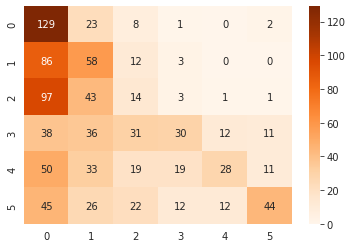

In [ ]:
evaluate2(y_test, y_pred)

In [ ]:
y_pred

Example of sentences not well classified

//todo

In [ ]:
from tqdm import tqdm

In [ ]:
# Create list of configs
def configs():

    models = list()
    
    # Define config lists
    leaf_size = range(1,10)
    n_neighbors = range(1,10)
    p = [1,2]
    # Create config instances
    for n in leaf_size:
      for i in n_neighbors:
        for j in p:
          cfg = [n, i, j]
          models.append(cfg)
    return models

configs = configs()
configs

In [ ]:
# Define list for result
result = []

for config in tqdm(configs):

    # Define classifier
    knn = KNeighborsClassifier(leaf_size = config[0], n_neighbors = config[1], p = config[2])

    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', knn )])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

100%|██████████| 162/162 [01:05<00:00,  2.46it/s]


In [ ]:
result.sort(key=lambda x: x[1], reverse=True)
KNNTuningDF = (pd.DataFrame(result)).rename(columns = {0:'config', 1: 'accuracy'})

In [ ]:
KNNTuningDF

,config,accuracy
0,"[1, 1, 2]",0.367708
1,"[2, 1, 2]",0.367708
2,"[3, 1, 2]",0.367708
3,"[4, 1, 2]",0.367708
4,"[5, 1, 2]",0.367708
...,...,...
157,"[5, 9, 1]",0.170833
158,"[6, 9, 1]",0.170833
159,"[7, 9, 1]",0.170833
160,"[8, 9, 1]",0.170833


In [ ]:
KNNTuningDF.to_csv("knn.csv")

Let's use those parameters


In [ ]:
knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 1, p = 2)

pipe = Pipeline([('vectorizer', tfidf_vector),
            ('classifier', knn )])

# Fit model on training set
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

,accuracy,precision,recall,f1 score
results,0.3677,0.3997,0.3677,0.353


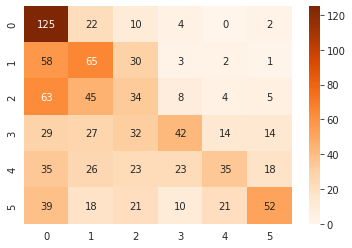

In [ ]:
evaluate2(y_test, y_pred)

Prediction on the unlabelled_test_data.csv (dfTest)

first, let's the fit on the whole data

In [ ]:
pipe.fit(X, y)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=1))])

In [ ]:
predDifficulty = pipe.predict(dfTest['sentence'])

In [ ]:
# Grid Search - hyperparameter tuning
# Grid Search - hyperparameter tuning
from sklearn.model_selection import GridSearchCVprediction(predDifficulty, "KnnTuning", True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,difficulty
id,
0,C2
1,B1
2,A1
3,A2
4,C2


# Grid Search - hyperparameter tuning
# Grid Search - hyperparameter tuning
from sklearn.model_selection import GridSearchCV**Submission KNN is a KNN classifier without data cleaning**

**score: 0.33833**


###**Knn Parameters Tuning**

In [ ]:
# Grid Search - hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe = Pipeline(steps = [('vectorizer', tfidf_vector),
                 ('classifier', knn)])

params = {'classifier__n_neighbors': range(1,5)} 
# we have tested with a range of 20 and the best parameter remains 1

search = GridSearchCV(pipe, params)
search.fit(X_train, y_train)

In [ ]:
search.best_params_

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
pipe = Pipeline(steps = [('vectorizer', tfidf_vector),
                 ('classifier', knn)])
pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
evaluate(y_test, y_pred)

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');

In [ ]:
# test to see the differences between the parameters
for i in range(1,10):
  print("n_neighbors: %i" %i)
  knn = KNeighborsClassifier(n_neighbors=i)
  pipe = Pipeline(steps = [('vectorizer', tfidf_vector),
                 ('classifier', knn)])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  evaluate(y_test, y_pred)
  print("-----------------------")

## 3. Decision Tree (without data cleaning)


### Decision tree without tuning

In [ ]:
# import some additional packages 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [ ]:
tree = DecisionTreeClassifier(random_state = 0)

pipe = Pipeline(steps = [('vectorizer', tfidf_vector),
                 ('classifier', tree)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier(random_state=0))])

In [ ]:
y_pred = pipe.predict(X_test)

,accuracy,precision,recall,f1 score
results,0.3083,0.3055,0.3083,0.3055


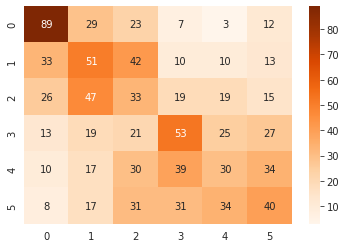

In [ ]:
evaluate2(y_test, y_pred)

example not classified : todo

###**Decision Tree Classifier Parameters Tuning**

In [ ]:
# Create list of configs
def configs():

    models = list()
    
    # Define config lists
    criterion = ['gini', 'entropy']
    max_depth = range(1,25)
    min_samples_split = [0.5, 1.0, 2, 3]
    min_samples_leaf = range(1,10)
    # Create config instances
    for n in criterion:
      for i in max_depth:
        for j in min_samples_split:
          for k in min_samples_leaf :
            cfg = [n, i, j, k]
            models.append(cfg)
    return models

configs = configs()
configs

In [ ]:
# Define list for result
result = []

for config in tqdm(configs):


    # Define classifier
    tree = DecisionTreeClassifier(criterion = config[0], max_depth = config[1], min_samples_split = config[2], min_samples_leaf = config[3], random_state = 0)

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', tree)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

100%|██████████| 1728/1728 [06:15<00:00,  4.61it/s]


In [ ]:
result.sort(key=lambda x: x[1], reverse=True)
TreeTuningDF = (pd.DataFrame(result)).rename(columns = {0:'config', 1: 'accuracy'})

In [ ]:
TreeTuningDF.head()

,config,accuracy
0,"[gini, 11, 2, 1]",0.330208
1,"[gini, 12, 3, 1]",0.327083
2,"[entropy, 12, 2, 2]",0.327083
3,"[entropy, 12, 3, 2]",0.327083
4,"[gini, 11, 3, 1]",0.326042


Now let's fit our model once again using the best parameters found

In [ ]:
# Define classifier
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 11 ,min_samples_split = 2, min_samples_leaf = 1,random_state = 0)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
              ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=11, random_state=0))])

In [ ]:
y_pred = pipe.predict(X_test)

,accuracy,precision,recall,f1 score
results,0.3302,0.3254,0.3302,0.3145


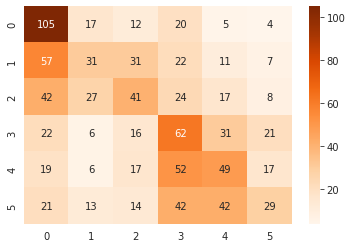

In [ ]:
evaluate2(y_test, y_pred)

>Predictions on the `unlabelled_test_data.csv` (dfTest)

first, let's the fit on the whole data

In [ ]:
pipe.fit(X, y)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=11, random_state=0))])

In [ ]:
predDifficulty = pipe.predict(dfTest['sentence'])

In [ ]:
prediction(predDifficulty, "DecisionTreeTuning", True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,difficulty
id,
0,C2
1,B1
2,A1
3,A1
4,C2


**Decision Tree without data cleaning**

**score: 0.325**

next:

In [ ]:
tree = DecisionTreeClassifier()

pipe = Pipeline(steps = [('vectorizer', tfidf_vector),
                 ('classifier', tree)])

params = {'classifier__max_depth': range(1,9)}
# we have tested with a range of 20 and the best parameter remains 8

search = GridSearchCV(pipe, params)
search.fit(X_train, y_train)

In [ ]:
search.best_params_

> The Decision Tree with the max_depth of 8 (the best parameter for this set)

In [ ]:
# Define classifier (tree)
tree = DecisionTreeClassifier(max_depth=8, random_state=0)

# Create pipeline
pipe = Pipeline(steps = [('vectorizer', tfidf_vector),
                 ('classifier', tree)])

# Fit model on training set
pipe.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

In [ ]:
# Evaluation - test set of dfTrain
evaluate(y_test, y_pred)

> The confusion matrix

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');

## 4. Random Forests (without data cleaning)


In [ ]:
# import some additional packages
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define classifier
forest = RandomForestClassifier(random_state = 0)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', forest)])

# Fit model on training set
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

,accuracy,precision,recall,f1 score
results,0.4062,0.4073,0.4062,0.3932


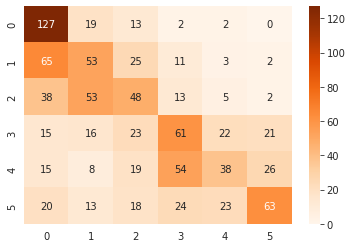

In [ ]:
# Evaluation - test set of dfTrain
evaluate2(y_test, y_pred)

examples not well classified

###**Decision Tree Parameters Tuning**

In [ ]:
# Create list of configs
def configs():

    models = list()
    
    # Define config lists
    n_estimators = [50,100,150,200]
    max_depth = [None, 10, 50]
    min_samples_split = [2,5,10]
    # Create config instances
    for n in n_estimators:
      for i in max_depth:
        for j in min_samples_split:
          cfg = [n, i, j]
          models.append(cfg)
    return models

configs = configs()
configs

In [ ]:
# Define list for result
result = []

for config in tqdm(configs):


    # Define classifier
    forest = RandomForestClassifier(n_estimators = config[0], max_depth = config[1], min_samples_split = config[2], random_state = 0)


    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', forest)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

100%|██████████| 36/36 [01:29<00:00,  2.50s/it]


In [ ]:
result.sort(key=lambda x: x[1], reverse=True)
ForestDF = (pd.DataFrame(result)).rename(columns = {0:'config', 1: 'accuracy'})

In [ ]:
ForestDF.head()

,config,accuracy
0,"[50, None, 10]",0.414583
1,"[150, None, 2]",0.413542
2,"[150, None, 10]",0.413542
3,"[100, None, 5]",0.412500
4,"[100, None, 10]",0.410417


Now let's fit our model once again using the best parameters found

In [ ]:
# Define classifier
forest = RandomForestClassifier(n_estimators = 50, max_depth = None, min_samples_split = 10, random_state = 0)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
              ('classifier', forest)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 RandomForestClassifier(min_samples_split=10, n_estimators=50,
                                        random_state=0))])

In [ ]:
y_pred = pipe.predict(X_test)

,accuracy,precision,recall,f1 score
results,0.4146,0.4086,0.4146,0.4027


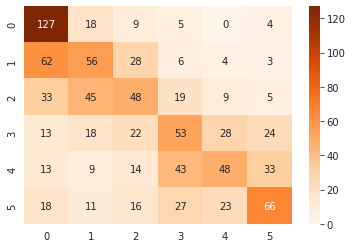

In [ ]:
evaluate2(y_test, y_pred)

>predictions on the `unlabelled_test_data.csv` (dfTest)

first, let's the fit on the whole data

In [ ]:
pipe.fit(X, y)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 RandomForestClassifier(min_samples_split=10, n_estimators=50,
                                        random_state=0))])

In [ ]:
predDifficulty = pipe.predict(dfTest['sentence'])

In [ ]:
prediction(predDifficulty, "RandomForestTuning", True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,difficulty
id,
0,C2
1,B1
2,A1
3,A1
4,C2


**Random Forest Classifier score without data cleaning**

**score: 0.39833**

# The second part of the project 
Here we test others techniques for the competition

## 5. Testing Logistic Regression without data cleaning on dfTest



Là, tu testes sur tout le dfTrain. Mais comme t'as dit hier, on peut pas évaluer la précision du modèle. Après, jsp si on a le droit de faire ça.  

In [ ]:
X = dfTrain["sentence"]
y = dfTrain["difficulty"]

# Define classifier
classifier = LogisticRegression()

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X, y)

In [ ]:
#new data framed predicted on test data:
LogisticPred_DF = pd.DataFrame()

In [ ]:
#TEST
dfTest.iloc[0,0]

In [ ]:
#TEST
dfTest.iloc[1,0]

In [ ]:
predDifficulty = pipe.predict(dfTest['sentence'])

In [ ]:
LogisticPred_DF_2 = pd.DataFrame(data = predDifficulty)
LogisticPred_DF_2.index.names = ['id']
LogisticPred_DF_2.rename(columns = {0:'difficulty'}, inplace = True)
LogisticPred_DF_2

In [ ]:
from google.colab import files
LogisticPred_DF_2.to_csv('submission1.csv')

> **DOWNLOAD:**

In [ ]:
files.download('submission1.csv')

## 6. Testing Logistic Regression with stopwords and punctuation



In [ ]:
import string

In [ ]:
def spacy_tokenizer(sentence):
    # Create token object
    mytokens = sp(sentence)
    stop_words = spacy.lang.fr.stop_words.STOP_WORDS
    punctuations = string.punctuation

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    
    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Return preprocessed list of tokens
    return mytokens

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) # we use the above defined tokenizer

In [ ]:
X = dfTrain["sentence"]
y = dfTrain["difficulty"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


# Define classifier
classifier = LogisticRegression(max_iter=1000)

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7fd25e4589d0>)),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
# Evaluation - test set of dfTrain
evaluate(y_test, y_pred)

> The confusion matrix

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');

In [ ]:
pipe.fit(X, y)
predDifficulty = pipe.predict(dfTest['sentence'])
LogisticPred_DF = pd.DataFrame(data = predDifficulty)
LogisticPred_DF.index.names = ['id']
LogisticPred_DF.rename(columns = {0:'difficulty'}, inplace = True)
LogisticPred_DF.to_csv('submission2.csv')

> **DOWNLOAD:**

In [ ]:
# files.download('submission2.csv')

## 7. Testing Logistic Regression with better parameters for the TfidfVectorizer


In [ ]:
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Create spacy object
    mytokens = sp(sentence)
    
    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    
    # Return preprocessed list of tokens
    return mytokens

In [ ]:
test = dfTrain['sentence'].iloc[0]

> Improving text preparation

In [ ]:
# Create list of configs
def configs():

    models = list()
    
    # Define config lists
    ngram_range = [(1,1), (1,2), (1, 3), (2, 2), (2, 3), (3, 3)]
    analyzer=['word', 'char']
    
    # Create config instances
    for n in ngram_range:
      for a in analyzer:
        cfg = [n, a]
        models.append(cfg)
    return models

configs = configs()
configs

[[(1, 1), 'word'],
 [(1, 1), 'char'],
 [(1, 2), 'word'],
 [(1, 2), 'char'],
 [(1, 3), 'word'],
 [(1, 3), 'char'],
 [(2, 2), 'word'],
 [(2, 2), 'char'],
 [(2, 3), 'word'],
 [(2, 3), 'char'],
 [(3, 3), 'word'],
 [(3, 3), 'char']]

It takes 7 minutes to run the following code ⏰ :t




In [ ]:
# Define list for result
result = []

for config in configs:

    # Redefine vectorizer
    tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=config[0], analyzer=config[1])

    # Define classifier
    classifier = LogisticRegression()

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

> The list of the parameters of the TfidfVectorizer class (sorted to by accuracy)

In [ ]:
result.sort(key=lambda x: x[1], reverse=True)
result

[[[(1, 2), 'word'], 0.47604166666666664],
 [[(1, 1), 'word'], 0.4739583333333333],
 [[(1, 3), 'char'], 0.465625],
 [[(2, 3), 'char'], 0.46458333333333335],
 [[(3, 3), 'char'], 0.4635416666666667],
 [[(1, 2), 'char'], 0.4510416666666667],
 [[(2, 2), 'char'], 0.446875],
 [[(1, 3), 'word'], 0.44375],
 [[(2, 2), 'word'], 0.42083333333333334],
 [[(2, 3), 'word'], 0.403125],
 [[(1, 1), 'char'], 0.39479166666666665],
 [[(3, 3), 'word'], 0.35]]

> Train the model, with the best parameters of the TfidfVectorizer class

In [ ]:
# we use the above defined tokenizer and the best parameters 
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                               ngram_range=(1,2), min_df=1, 
                               max_df=1.0, analyzer='word') 

In [ ]:
classifier = LogisticRegression(max_iter=1000)

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7f40418c5ca0>)),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = pipe.predict(X_test)

> The evaluation of the model and the confusion matrix






In [ ]:
# Evaluation - test set 
evaluate(y_test, y_pred)

Accuracy score: 0.4760 
Precision: 0.4757 
Recall: 0.4760 
F1_Score: 0.4688


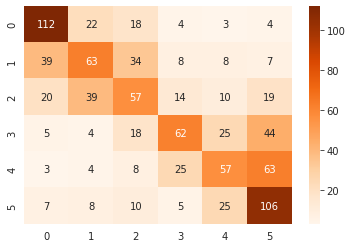

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');

> To submit the model

In [ ]:
predDifficulty = pipe.predict(dfTest['sentence'])

LogisticPred_DF_7 = pd.DataFrame(data = predDifficulty)
LogisticPred_DF_7.index.names = ['id']
LogisticPred_DF_7.rename(columns = {0:'difficulty'}, inplace = True)
LogisticPred_DF_7.to_csv('submission3.csv')

In [ ]:
# Download the file
# files.download('submission3.csv')

## 8. Bag of Words (classic BOW)

In [ ]:
# Create list of configs
def configs():

    models = list()
    
    # Define config lists
    ngram_range = [(1,1), (1,2), (1, 3), (2, 2)]
    max_df = [1.0, 0.7, 0.5, 0.16]
    
    # Create config instances
    for n in ngram_range:
      for i in max_df:
        cfg = [n, i]
        models.append(cfg)
    return models

configs = configs()
configs

[[(1, 1), 1.0],
 [(1, 1), 0.7],
 [(1, 1), 0.5],
 [(1, 1), 0.16],
 [(1, 2), 1.0],
 [(1, 2), 0.7],
 [(1, 2), 0.5],
 [(1, 2), 0.16],
 [(1, 3), 1.0],
 [(1, 3), 0.7],
 [(1, 3), 0.5],
 [(1, 3), 0.16],
 [(2, 2), 1.0],
 [(2, 2), 0.7],
 [(2, 2), 0.5],
 [(2, 2), 0.16]]

In [ ]:
# Define list for result
result = []

for config in configs:

    # Redefine vectorizer
    count_vector = CountVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=config[0], max_df=config[1])

    # Define classifier
    classifier = LogisticRegression()

    # Create pipeline
    pipe = Pipeline([('vectorizer', count_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

In [ ]:
result.sort(key=lambda x: x[1], reverse=True)
result

The results from above in case you don't want to wait 25min.

1. [(1, 2), 0.7], 0.4791666666666667],
2. [(1, 1), 0.5], 0.4739583333333333],
3. [(1, 2), 1.0], 0.46979166666666666],
4. [(1, 1), 0.7], 0.46875],
5. [(1, 1), 1.0], 0.465625],
6. [(1, 3), 0.7], 0.46458333333333335],
7. [(1, 3), 1.0], 0.46145833333333336],
8. [(1, 1), 0.16], 0.46041666666666664],
9. [(1, 3), 0.5], 0.453125],
10. [(1, 2), 0.5], 0.4510416666666667],
11. [(1, 2), 0.16], 0.45],
12. [(1, 3), 0.16], 0.43645833333333334],
13. [(2, 2), 0.16], 0.40520833333333334],
14. [(2, 2), 1.0], 0.4],
15. [(2, 2), 0.7], 0.4],
16. [(2, 2), 0.5], 0.4]]



> Train the model, with the best parameters of the CountVectorizer

In [ ]:
def spacy_tokenizer(sentence):
    # Create spacy object
    mytokens = sp(sentence)
    
    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    
    # Return preprocessed list of tokens
    return mytokens

In [ ]:
count_vector = CountVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,2), max_df=0.7)

In [ ]:
classifier = LogisticRegression(max_iter=1000)

pipe = Pipeline([('vectorizer', count_vector),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.7, ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7fd24f3d8a60>)),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = pipe.predict(X_test)

> The evaluation of the model and the confusion matrix


In [ ]:
# Evaluation - test set 
evaluate(y_test, y_pred)

Accuracy score: 0.4771 
Precision: 0.4710 
Recall: 0.4771 
F1_Score: 0.4703


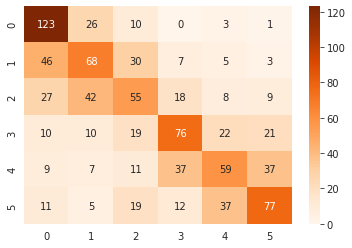

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');

>To submit the model

In [ ]:
predDifficulty = pipe.predict(dfTest['sentence'])

LogisticPred_DF_8 = pd.DataFrame(data = predDifficulty)
LogisticPred_DF_8.index.names = ['id']
LogisticPred_DF_8.rename(columns = {0:'difficulty'}, inplace = True)
LogisticPred_DF_8.to_csv('submission4.csv')

In [ ]:
# Download the file
# files.download('submission4.csv')

## 9. Logistic Regression with cross validation



In [ ]:
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Create spacy object
    mytokens = sp(sentence)
    
    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    
    # Return preprocessed list of tokens
    return mytokens

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                               ngram_range=(1,2), min_df=1, 
                               max_df=1.0, analyzer='word') 

**It takes 9 min to run the following code ⏰**

In [ ]:
classifier = LogisticRegressionCV(max_iter=500, cv=5, random_state=0)

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7f7d9683ba60>)),
                ('classifier', MultinomialNB())])

In [ ]:
y_pred = pipe.predict(X_test)

> The evaluation of the model and the confusion matrix


In [ ]:
# Evaluation - test set 
evaluate(y_test, y_pred)

Accuracy score: 0.4594 
Precision: 0.4908 
Recall: 0.4594 
F1_Score: 0.4513


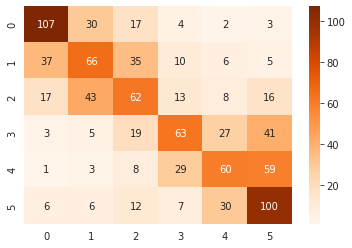

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');

>**Train the model with the entire Train Dataframe**

In [ ]:
X = dfTrain["sentence"]
y = dfTrain["difficulty"]

# Define classifier
classifier = LogisticRegressionCV(max_iter=500, cv=5, random_state=0)

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X, y)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7f403d2c15e0>)),
                ('classifier',
                 LogisticRegressionCV(cv=5, max_iter=500, random_state=0))])

>To submit the model

In [ ]:
predDifficulty = pipe.predict(dfTest['sentence'])

LogisticPred_DF_8 = pd.DataFrame(data = predDifficulty)
LogisticPred_DF_8.index.names = ['id']
LogisticPred_DF_8.rename(columns = {0:'difficulty'}, inplace = True)
LogisticPred_DF_8.to_csv('submission5.csv')

In [ ]:
# Download the file
files.download('submission5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 10. Naive Bayes

In [ ]:
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Create spacy object
    mytokens = sp(sentence)
    
    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    
    # Return preprocessed list of tokens
    return mytokens

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,2)) 
classifier = naive_bayes.MultinomialNB()

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7f4e2fb6bc10>)),
                ('classifier', MultinomialNB())])

In [ ]:
y_pred = pipe.predict(X_test)

# Evaluation - test set 
evaluate(y_test, y_pred)

Accuracy score: 0.4594 
Precision: 0.4908 
Recall: 0.4594 
F1_Score: 0.4513


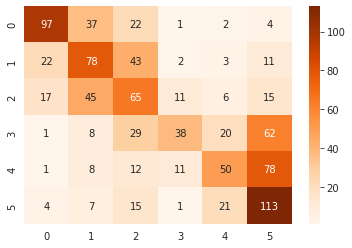

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');

>To submit the model

In [ ]:
X = dfTrain["sentence"]
y = dfTrain["difficulty"]

# Define classifier
classifier = naive_bayes.MultinomialNB()

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X, y)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7fd25f0f6040>)),
                ('classifier', MultinomialNB())])

In [ ]:
predDifficulty = pipe.predict(dfTest['sentence'])

LogisticPred_DF_10 = pd.DataFrame(data = predDifficulty)
LogisticPred_DF_10.index.names = ['id']
LogisticPred_DF_10.rename(columns = {0:'difficulty'}, inplace = True)
LogisticPred_DF_10.to_csv('submission6.csv')

## 11. Linear Support Vector Machine (LinearSVC) 

In [ ]:
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)
    # Lemmatize each token and convert each token into lowercase (this is a bit of data cleaning)
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ] 
    
    # Return preprocessed list of tokens
    return mytokens

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,2)) 

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from scipy.stats import reciprocal, uniform
# Create list of configs
def configs():

    models = list()
    
    # Define config lists
    loss=['hinge', 'squared_hinge']
    # Create config instances
    for n in loss:
      cfg = [n]
      models.append(cfg)
    return models

configs = configs()
configs

[['hinge'], ['squared_hinge']]

In [ ]:
# Define list for result
result = []

for config in configs:

    # Redefine vectorizer
    tfidf_vector =  TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,2)) 

    # Define classifier tol=1e-5
    classifier = LinearSVC(random_state=0, C=1, tol=0.001, 
                           loss=config[0])

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

In [ ]:
result.sort(key=lambda x: x[1], reverse=True)
result

[[['squared_hinge'], 0.4822916666666667], [['hinge'], 0.4708333333333333]]

The results 

1. [[1e-05], 0.4822916666666667],
2. [[0.0001], 0.4822916666666667],
3. [[0.001], 0.4822916666666667],
4. [[0.1], 0.48125]]

Other results

1. ['squared_hinge'], 0.4822916666666667], 
2. ['hinge'], 0.4708333333333333]

Other results

1. [[0.001, 1], 0.4822916666666667],
2. [[0.1, 1], 0.48125],
3. [[0.1, 2], 0.4791666666666667],
4. [[0.001, 2], 0.478125],
5. [[0.001, 5], 0.471875],
6. [[0.1, 7], 0.471875],
7. [[0.001, 7], 0.4708333333333333],
8. [[0.001, 10], 0.4708333333333333],
9. [[0.1, 5], 0.4708333333333333],
10. [[0.1, 10], 0.4708333333333333]]

In [ ]:
# Define classifier
classifier = LinearSVC(random_state=0, C=1, tol=0.001)

In [ ]:
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7fb08634dc10>)),
                ('classifier', LinearSVC(C=1, random_state=0, tol=0.001))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
# Evaluation - test set 
evaluate(y_test, y_pred)

Accuracy score: 0.4823 
Precision: 0.4801 
Recall: 0.4823 
F1_Score: 0.4755


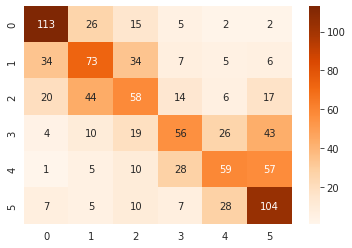

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');

>To submit the model

In [ ]:
predDifficulty = pipe.predict(dfTest['sentence'])

SVCPred_DF = pd.DataFrame(data = predDifficulty)
SVCPred_DF.index.names = ['id']
SVCPred_DF.rename(columns = {0:'difficulty'}, inplace = True)
SVCPred_DF.to_csv('submission7.csv')

In [ ]:
from google.colab import files

In [ ]:
# Download the file
files.download('submission7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 12. Ensemble models

In [ ]:
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)
    # Lemmatize each token and convert each token into lowercase (this is a bit of data cleaning)
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ] 
    # Return preprocessed list of tokens
    return mytokens

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,2)) 

In [ ]:
!pip install mlrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=817feecca4edfada829137ff945c35809e153dc51d0a5cf739f763cc6d57c9e2
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [ ]:
# import some additional packages 
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
logclf=LogisticRegression(penalty='l2',C=0.001, random_state=0)
treeclf=DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)
knnclf=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [ ]:
 clf_ens= EnsembleVoteClassifier(clfs=[logclf,treeclf,knnclf],weights=[1.5,1,1])

In [ ]:
clf_ens

EnsembleVoteClassifier(clfs=[LogisticRegression(C=0.001, random_state=0),
                             DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    random_state=0),
                             KNeighborsClassifier()],
                       weights=[1.5, 1, 1])

In [ ]:
clf_ens.fit(X_train, y_train)

ValueError: ignored

## 1X. Bert

In [ ]:
#test CamemBERT or  FlauBERT or RoBERTa

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 25.3 MB/s 
     |████████████████████████████████| 182 kB 80.7 MB/s 
     |████████████████████████████████| 7.6 MB 62.3 MB/s 


In [ ]:
import torch
from transformers import *

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [ ]:
# Tokeniser, Model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForNextSentencePrediction.from_pretrained('bert-base-multilingual-cased')
model.eval()

In [ ]:
text = "Comment ça va ? Bien merci, un peu stressé avant l'examen"
# Texte tokenisé
tokenized_text = tokenizer.tokenize(text)
# Convertir le texte en indexs
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
segments_ids = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
# Transformer en tenseurs
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
predictions = model(tokens_tensor, segments_tensors)

In [ ]:
if np.argmax(predictions) == 0:
    print("Suite")
else:
    print("Pas la suite")

Suite


In [ ]:
#importing the necessary libraries
import torch
from transformers import BertTokenizer, BertForMaskedLM

In [ ]:
#instantiating the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForMaskedLM.from_pretrained('bert-base-multilingual-cased')


Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/pytorch_model.bin
Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of BertForMaskedLM were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the chec

Autre exemple

In [ ]:
!pip install -U tensorflow

import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow_text

import tensorflow_text as text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 1.7 MB 28.8 MB/s 
     |████████████████████████████████| 6.0 MB 42.9 MB/s 
     |████████████████████████████████| 439 kB 72.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

ValueError: ignored

In [ ]:

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

NameError: ignored

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, batch_size = 32)

AttributeError: ignored

# Summary of our results


> **Submission 1 is a Logistic Regression without data cleaning** 
>
> (5. Testing Logistic Regression without data cleaning on dfTest)
>
> **score: 0.465**

>**Submission 2 is a Logistic Regression with stopwords and punctuation** 
>
>(6. Testing Logistic Regression with stopwords and punctuation)
>
>**score: 0.41916**

>**Submission 3 is a Logistic Regression with better parameters for the TfidfVectorizer** 
>
>(7. Testing Logistic Regression with better parameters for the TfidfVectorizer)
>
>**score: 0.43916**

>**Submission 4 is a Logistic Regression with better parameters for the CountVectorizer (Bag of Words)** 
>
>(8. Bag of Words)
>
>**score: 0.45166**

>**Submission 5 is a Logistic Regression with cross validation** 
>
>(9. Logistic Regression with cross validation)
>
>**score: 0.4625**

>**Submission 6 is a Naive Bayes** 
>
>(10. Naive Bayes)
>
>**score: 0.45**

>**Submission 7 is a Linear SVC model** 
>
>(11. Linear SVC)
>
>**score: 0.45583**

# X. test

In [ ]:
my_doc = sp(dfTrain['sentence'].iloc[0])
# POS
for word in my_doc:
    print(word.text, word.pos_)

Les DET
coûts NOUN
kilométriques ADJ
réels ADJ
peuvent VERB
diverger VERB
sensiblement VERB
des ADP
valeurs NOUN
moyennes ADJ
en ADP
fonction NOUN
du ADP
moyen NOUN
de ADP
transport NOUN
utilisé VERB
, PUNCT
du ADP
taux NOUN
d' ADP
occupation NOUN
ou CCONJ
du ADP
taux NOUN
de ADP
remplissage NOUN
, PUNCT
de ADP
l' DET
infrastructure NOUN
utilisée VERB
, PUNCT
de ADP
la DET
topographie NOUN
des ADP
lignes NOUN
, PUNCT
du ADP
flux NOUN
de ADP
trafic NOUN
, PUNCT
etc. ADV


In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Dependency Parsing
for chunk in my_doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

Les coûts kilométriques coûts nsubj peuvent
valeurs moyennes valeurs obl:arg sensiblement
fonction fonction nmod valeurs
moyen moyen nmod fonction
transport transport nmod moyen
taux taux nmod valeurs
occupation occupation nmod taux
du taux taux conj taux
remplissage remplissage nmod taux
l'infrastructure infrastructure nmod taux
la topographie topographie nmod taux
lignes lignes nmod topographie
, du flux flux conj lignes
trafic trafic nmod flux


> Resampling ? 
It's almost already done in the dfTrain

In [ ]:
dfTrain['difficulty'].value_counts(normalize=True)

A1    0.169375
C2    0.168125
C1    0.166250
B1    0.165625
A2    0.165625
B2    0.165000
Name: difficulty, dtype: float64

In [ ]:
dfTrain.groupby('difficulty').describe()

sentence                                                            \
              count unique                                                top   
difficulty                                                                      
A1              813    813  Le bleu, c'est ma couleur préférée mais je n'a...   
A2              795    795  voilà une autre histoire que j'ai beaucoup aimée.   
B1              795    795  Dans les écoles de commerce, dans les couloirs...   
B2              792    792  Il est particulièrement observé chez les perso...   
C1              798    798  Les coûts kilométriques réels peuvent diverger...   
C2              807    807  Ma timidité me quittait dès que je m'éloignais...   

                 
           freq  
difficulty       
A1            1  
A2            1  
B1            1  
B2            1  
C1            1  
C2            1

à tester en voir plus sur internet

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 4, init='k-means++',n_init=10, verbose=1, random_state=0)

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', km)])

pipe.fit(X_train, y_train)

# X. test2